# Project:  Sentiment Analysis with RF

## Table of Contents

<ul>
<li><a href="#PS">Problem Statement</a></li>
<li><a href="#DG">Data Gathering</a></li>
<li><a href="#A&C">Assessing & Cleaning</a></li>
<li><a href="#SP">Splitting & Data Modeling</a></li>
</ul>

<a id="PS"><a/>
# Problem Statement

>Building a model that can classify the sentimental feedback of a customer based on his review for a certain book.

<a id="DG"><a/>
# Data Gathering

In [1]:
import pandas as pd
% matplotlib inline 

In [2]:
df = pd.read_csv(r'E:\all_kindle_review.csv')

In [3]:
#displaying the frist rows of the data
df.head()

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


<a id='A&C'><a/>
# Data Assessing & Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      12000 non-null  int64 
 1   Unnamed: 0.1    12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         12000 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


In [5]:
#droping all the unneeded columns in our dataset
df = df.drop(['Unnamed: 0','Unnamed: 0.1','asin','helpful','reviewTime','reviewerID','reviewerName','unixReviewTime'], axis=1)


In [6]:
df.head()

,rating,reviewText,summary
0,3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average
1,5,Great short read. I didn't want to put it dow...,Terrific menage scenes!
2,3,I'll start by saying this is the first of four...,Snapdragon Alley
3,3,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy
4,4,I did not expect this type of book to be in li...,Book


In [7]:
#displaying the text to see what it contains
df['reviewText'][0]

'Jace Rankin may be short, but he\'s nothing to mess with, as the man who was just hauled out of the saloon by the undertaker knows now. He\'s a famous bounty hunter in Oregon in the 1890s who, when he shot the man in the saloon, just finished a years long quest to avenge his sister\'s murder and is now trying to figure out what to do next. When the snotty-nosed farm boy he just rescued from a gang of bullies offers him money to kill a man who forced him off his ranch, he reluctantly agrees to bring the man to justice, but not to kill him outright. But, first he needs to tell his sister\'s widower the news.Kyla "Kyle" Springer Bailey has been riding the trails and sleeping on the ground for the past month while trying to find Jace. She wants revenge on the man who killed her husband and took her ranch, amongst other crimes, and she\'s not so keen on the detour Jace wants to take. But she realizes she\'s out of options, so she hides behind her boy persona as best she can and tries to ke

### We could leverage more context by merging reviewText column with summary.

In [8]:
df['review'] = df['reviewText'] + " " + df['summary']
df['review'][0]

'Jace Rankin may be short, but he\'s nothing to mess with, as the man who was just hauled out of the saloon by the undertaker knows now. He\'s a famous bounty hunter in Oregon in the 1890s who, when he shot the man in the saloon, just finished a years long quest to avenge his sister\'s murder and is now trying to figure out what to do next. When the snotty-nosed farm boy he just rescued from a gang of bullies offers him money to kill a man who forced him off his ranch, he reluctantly agrees to bring the man to justice, but not to kill him outright. But, first he needs to tell his sister\'s widower the news.Kyla "Kyle" Springer Bailey has been riding the trails and sleeping on the ground for the past month while trying to find Jace. She wants revenge on the man who killed her husband and took her ranch, amongst other crimes, and she\'s not so keen on the detour Jace wants to take. But she realizes she\'s out of options, so she hides behind her boy persona as best she can and tries to ke

In [9]:
df.head()

,rating,reviewText,summary,review
0,3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average,"Jace Rankin may be short, but he's nothing to ..."
1,5,Great short read. I didn't want to put it dow...,Terrific menage scenes!,Great short read. I didn't want to put it dow...
2,3,I'll start by saying this is the first of four...,Snapdragon Alley,I'll start by saying this is the first of four...
3,3,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy,Aggie is Angela Lansbury who carries pocketboo...
4,4,I did not expect this type of book to be in li...,Book,I did not expect this type of book to be in li...


In [10]:
#We can get rid of the these columns now
df = df.drop(['reviewText','summary'], axis=1)
df.head()

,rating,review
0,3,"Jace Rankin may be short, but he's nothing to ..."
1,5,Great short read. I didn't want to put it dow...
2,3,I'll start by saying this is the first of four...
3,3,Aggie is Angela Lansbury who carries pocketboo...
4,4,I did not expect this type of book to be in li...


### Now, we need to clean the text that we will be using to feed our model with. So, we will define a function and will apply it the text to do its magic.

In [11]:
#Imporing Regex and nltk Libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Defining all the needed variables to be cleaned

replace_by_space_re = re.compile('[/(){}\[\]\|@,;]')
bad_symbols_re = re.compile('[^0-9a-z #+_]')
remove_num_re = re.compile('[\d+]')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#Defining a function that clean the text.

def clean_text(text):
    text = text.lower()  #lowercase text
    text = replace_by_space_re.sub(' ', text) #replace REPLACE_BY_SPACE_RE symbols by space in text
    text = text.replace('x', '') #Remove the X values
    text = text.replace('\r',' ').replace('\n',' ') #Remove the new lines values
    text = remove_num_re.sub('', text) #removing numbers
    text = bad_symbols_re.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in stopwords) # delete stopwords from text
    return text

In [13]:
#Appling the clean_text function on the body column.
df['review'] = df['review'].apply(clean_text)
df['review'][0]

'jace rankin may short hes nothing mess man hauled saloon undertaker knows hes famous bounty hunter oregon shot man saloon finished years long quest avenge sisters murder trying figure net snottynosed farm boy rescued gang bullies offers money kill man forced ranch reluctantly agrees bring man justice kill outright first needs tell sisters widower newskyla kyle springer bailey riding trails sleeping ground past month trying find jace wants revenge man killed husband took ranch amongst crimes shes keen detour jace wants take realizes shes options hides behind boy persona best tries keep pace confrontation along way gets shot jace discovers kyles kyla come clean whole reason needs scoundrel dead hope hell still help herthe book share touching moments slowblooming romance kyla find good reason fear men hide behind boys persona watching jace slowly pull shell help conquer fears endearing pain real deeplyrooted didnt disappear face seiness neither understandable aversion marriage magically 

### At this stage, we will define another column in our data that maps all the ratings score that below 4 to be "Negative" and the above to be "Postive"

In [14]:
df['feedback'] = pd.Series(map(lambda x : 'postive' if x >= 4 else 'negative' ,df['rating']))

In [15]:
df.head(10)

,rating,review,feedback
0,3,jace rankin may short hes nothing mess man hau...,negative
1,5,great short read didnt want put read one sitti...,postive
2,3,ill start saying first four books wasnt epecti...,negative
3,3,aggie angela lansbury carries pocketbooks inst...,negative
4,4,epect type book library pleased find price rig...,postive
5,5,aislinn little girl big dreams death older bro...,postive
6,2,makings good story unfortunately disappointsit...,negative
7,4,got like collaborated short stories alot times...,postive
8,5,loved book hooked series hope kelsey mawell re...,postive
9,4,thats good thing short sweet tease gives every...,postive


In [16]:
#checking and inspecting our data after clensing stage 
df.describe()

,rating
count,12000.000000
mean,3.250000
std,1.421619
min,1.000000
25%,2.000000
50%,3.500000
75%,4.250000
max,5.000000


In [17]:
pd.DataFrame(df['feedback'].value_counts())

,feedback
postive,6000
negative,6000


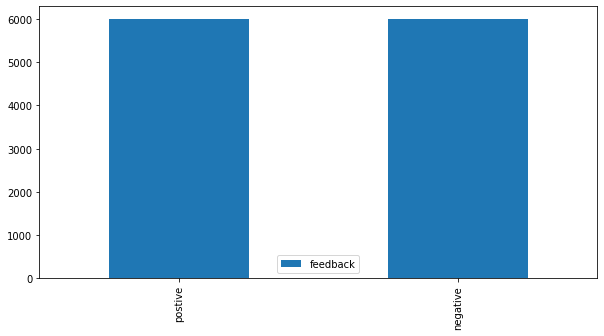

In [18]:
pd.DataFrame(df['feedback'].value_counts()).plot.bar(figsize=(10,5));

<a id="SP"><a/>
# Splitting Data & Data modeling

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df['review']
y = df['feedback']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [30]:
#importing classifier, transformers and metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [31]:
forest_model = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)),
                         ('MLF', RandomForestClassifier(n_estimators=500,criterion='gini',random_state=1))])                        

forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8319444444444445


In [23]:
print(y_pred[:11])
print(X_test[:11])

['negative' 'postive' 'postive' 'negative' 'postive' 'negative' 'postive'
 'postive' 'postive' 'postive' 'negative']
7104     writing terrible grammer terrible plot ridicul...
5878     love book cents short story good love caracter...
7311     yes question izzy many warnings go woods persi...
11984    guess im odd man book much bad luck happen two...
7959     lyall brothers shifters alphas gorgeous identi...
2125     free read know dont even bother time waste rea...
10699    cant seem get enough happily ever books much p...
4275     love susan mallerys recent books try fools gol...
5000     surviving least readsit still one favourite bo...
8143     probably good surviving ride briefcase hinged ...
3575     pretty average read writing style rather stilt...
Name: review, dtype: object
